In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Cycling data

In [2]:
df_cycling = pd.read_sql_table('cycling', 'sqlite:///data/my_data.sqlite', index_col=["Datetime"], parse_dates=["Datetime"])

In [3]:
df_cycling.head()

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2020-01-01 00:00:00,7,6.0,1.0,0,0.0,0.0
2020-01-01 00:15:00,20,14.0,6.0,0,0.0,0.0
2020-01-01 00:30:00,43,20.0,23.0,0,0.0,0.0
2020-01-01 00:45:00,40,7.0,33.0,0,0.0,0.0
2020-01-01 01:00:00,32,13.0,19.0,0,0.0,0.0


In [4]:
df_cycling.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:15:00',
               '2020-01-01 00:30:00', '2020-01-01 00:45:00',
               '2020-01-01 01:00:00', '2020-01-01 01:15:00',
               '2020-01-01 01:30:00', '2020-01-01 01:45:00',
               '2020-01-01 02:00:00', '2020-01-01 02:15:00',
               ...
               '2022-12-30 21:30:00', '2022-12-30 21:45:00',
               '2022-12-30 22:00:00', '2022-12-30 22:15:00',
               '2022-12-30 22:30:00', '2022-12-30 22:45:00',
               '2022-12-30 23:00:00', '2022-12-30 23:15:00',
               '2022-12-30 23:30:00', '2022-12-30 23:45:00'],
              dtype='datetime64[ns]', name='Datetime', length=93189, freq=None)

In [5]:
df_cycling.index.max() - df_cycling.index.min()

Timedelta('1094 days 23:45:00')

In [6]:
#df_cycling.groupby(df_cycling["Datetime"].dt.day)["100035541 (Neutor)"].sum()

In [7]:
may_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]["2020-05-01":"2020-05-31"]

In [95]:
august_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]["2021-08-01":"2021-08-31"]

In [8]:
t = may_bikes.index
t

DatetimeIndex(['2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
               '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-05-30', '2020-05-31'],
              dtype='datetime64[ns]', name='Datetime', freq='D')

In [9]:
#df_cycling.groupby(df_cycling["Datetime"].dt.hour)["100035541 (Neutor)"].sum().plot(kind='bar', rot=0, ax=axs)

In [10]:
df_cycling.describe()

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
count,93189.000000,92957.000000,88398.000000,93189.000000,92957.000000,88398.0
mean,91.436843,46.403316,47.596043,0.000172,0.000172,0.0
std,83.655899,46.150656,42.125215,0.026206,0.026239,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,20.000000,7.000000,12.000000,0.000000,0.000000,0.0
50%,72.000000,34.000000,40.000000,0.000000,0.000000,0.0
75%,143.000000,76.000000,72.000000,0.000000,0.000000,0.0
max,707.000000,390.000000,389.000000,4.000000,4.000000,0.0


In [11]:
df_cycling["100035541 (Neutor)"].max()

707

In [12]:
df_cycling[df_cycling["100035541 (Neutor)"]==707]

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2022-10-18 15:45:00,707,378.0,329.0,0,0.0,0.0


## Cycling cleaning

In [13]:
all_bikes = df_cycling["100035541 (Neutor)"]

In [14]:
daily_bikes = df_cycling.resample("1D").sum()["100035541 (Neutor)"]

In [15]:
hourly_bikes = df_cycling.resample("1H").sum()["100035541 (Neutor)"]
len(hourly_bikes)

26280

In [16]:
saturdays = daily_bikes[daily_bikes.index.dayofweek==5].index
sundays = daily_bikes[daily_bikes.index.dayofweek==6].index

In [17]:
weekday_bicycles = daily_bikes.drop(saturdays)
weekday_bicycles = weekday_bicycles.drop(sundays)
len(weekday_bicycles)

783

In [18]:
weekend_bicycles = daily_bikes[(daily_bikes.index.dayofweek==5) | (daily_bikes.index.dayofweek==6)]

In [19]:
daily_bikes[daily_bikes==0].tail(20)

Datetime
2022-01-22    0
2022-01-23    0
2022-01-24    0
2022-01-25    0
2022-01-26    0
2022-01-27    0
2022-01-28    0
2022-01-29    0
2022-01-30    0
2022-01-31    0
2022-02-28    0
2022-03-31    0
2022-04-30    0
2022-05-31    0
2022-06-30    0
2022-07-31    0
2022-08-31    0
2022-09-30    0
2022-10-31    0
2022-11-30    0
Name: 100035541 (Neutor), dtype: int64

In [20]:
hours = np.array(range(24))
bikes_per_hour = []
for hour in hours:
    hourly_bikes = all_bikes[all_bikes.index.hour == hour].sum()
    bikes_per_hour.append(hourly_bikes)

## Plotting bicycles

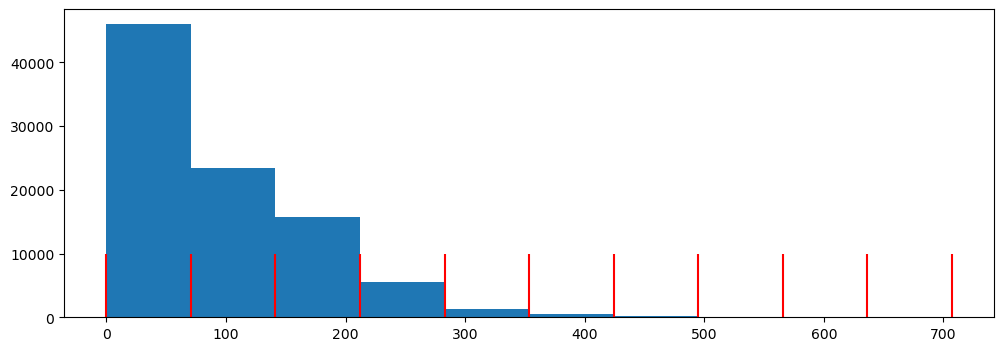

In [21]:
fig, ax1 = plt.subplots(figsize=(12, 4))
boundaries = ax1.hist(all_bikes)
ax1.vlines(boundaries[1], 0, 10000, colors="red")

Text(0.5, 1.0, 'Distribution of bicycles over hours of the day')

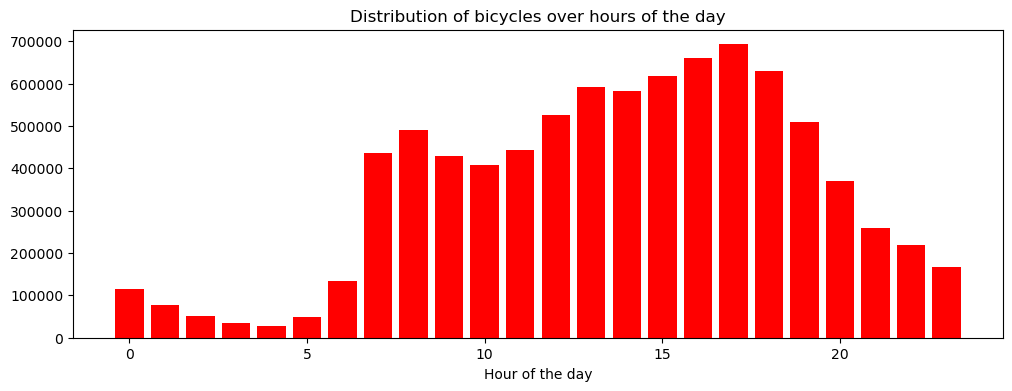

In [22]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.bar(hours, bikes_per_hour, color="red")
ax1.set_xlabel("Hour of the day")
ax1.set_title("Distribution of bicycles over hours of the day")

In [23]:
rush_hour_bikes = all_bikes[(all_bikes.index.hour >= 16) 
                            & (all_bikes.index.hour <= 18)]
daily_rush_hour_bikes = rush_hour_bikes.resample("1D").sum()
daily_rush_hour_bikes = daily_rush_hour_bikes[(daily_rush_hour_bikes.index.dayofweek!=5) 
                                              & (daily_rush_hour_bikes.index.dayofweek!=6)]

## Rain data

In [24]:
df_rain = pd.read_sql_table('rain', 'sqlite:///data/my_data.sqlite', index_col=["MESS_DATUM"], parse_dates=["MESS_DATUM"])

In [25]:
df_rain.head()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10,eor
MESS_DATUM,,,,,,
2020-01-01 00:00:00,1766,3,0,0.0,0,eor
2020-01-01 00:10:00,1766,3,0,0.0,0,eor
2020-01-01 00:20:00,1766,3,0,0.0,0,eor
2020-01-01 00:30:00,1766,3,0,0.0,0,eor
2020-01-01 00:40:00,1766,3,0,0.0,0,eor


In [26]:
df_rain["RWS_10"].min()

-999.0

In [27]:
df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_5848\3031983367.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_rain.resample("1D").sum()["2020-04-01":"2020-04-30"]


,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2020-04-01,254304,432,0,0.00,0
2020-04-02,254304,432,58,0.04,14
2020-04-03,254304,432,104,0.07,18
2020-04-04,254304,432,0,0.00,0
2020-04-05,254304,432,0,0.00,0
2020-04-06,254304,432,0,0.00,0
2020-04-07,254304,432,0,0.00,0
2020-04-08,254304,432,0,0.00,0
2020-04-09,254304,432,0,0.00,0


In [28]:
may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_5848\3278266870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_duration = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]


In [29]:
may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]

C:\Users\fabiw\AppData\Local\Temp\ipykernel_5848\1997511417.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  may_rain_amount = df_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]


## Rain cleaning

In [30]:
df_rain = df_rain.drop(columns=["eor"], axis=0)

In [31]:
df_rain.describe()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
count,157824.0,157824.0,157824.000000,157824.000000,157824.000000
mean,1766.0,3.0,1.151080,-1.051978,0.152176
std,0.0,0.0,2.981418,32.576974,0.359192
min,1766.0,3.0,0.000000,-999.000000,0.000000
25%,1766.0,3.0,0.000000,0.000000,0.000000
50%,1766.0,3.0,0.000000,0.000000,0.000000
75%,1766.0,3.0,0.000000,0.000000,0.000000
max,1766.0,3.0,10.000000,9.660000,1.000000


In [32]:
df_rain["RWS_10"].min()

-999.0

In [33]:
idx_erroneous_rows = df_rain[df_rain["RWS_10"] < 0].index

In [34]:
cleaned = df_rain.drop(idx_erroneous_rows, axis=0)

In [35]:
rain_amounts = cleaned.resample("1D").sum()["RWS_10"]
rain_duration = cleaned.resample("1D").sum()["RWS_DAU_10"]

In [36]:
weekday_rain_amounts = rain_amounts[(rain_amounts.index.dayofweek!=5) & (rain_amounts.index.dayofweek!=6)]
weekend_rain_amounts = rain_amounts[(rain_amounts.index.dayofweek==5) | (rain_amounts.index.dayofweek==6)]
weekday_rain_duration = rain_duration[(rain_duration.index.dayofweek!=5) & (rain_duration.index.dayofweek!=6)]
weekend_rain_duration = rain_duration[(rain_duration.index.dayofweek==5) | (rain_duration.index.dayofweek==6)]

In [37]:
rain_without_amount = cleaned[(cleaned["RWS_DAU_10"]>0) & (cleaned["RWS_10"]==0)]["RWS_DAU_10"].index
actual_rain = cleaned.drop(rain_without_amount, axis=0)

In [38]:
rain_amounts = actual_rain.resample("1D").sum()["RWS_10"]
rain_duration = actual_rain.resample("1D").sum()["RWS_DAU_10"]

In [39]:
may_rain_amount_cleaned = actual_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_10"]
may_rain_duration_cleaned = actual_rain.resample("1D").sum()["2020-05-01":"2020-05-31"]["RWS_DAU_10"]

In [96]:
august_rain_amount = actual_rain.resample("1D").sum()["2021-08-01":"2021-08-31"]["RWS_10"]
august_rain_duration = actual_rain.resample("1D").sum()["2021-08-01":"2021-08-31"]["RWS_DAU_10"]

In [40]:
df_rain.loc["2020-05-13"]["RWS_DAU_10"].sum()

239

In [41]:
rush_hour_rain = actual_rain[(actual_rain.index.hour >= 16) 
                            & (actual_rain.index.hour <= 18)]
daily_rush_hour_duration = rush_hour_rain.resample("1D").sum()["RWS_DAU_10"]
daily_rush_hour_duration = daily_rush_hour_duration[(daily_rush_hour_duration.index.dayofweek !=5) 
                                                    & (daily_rush_hour_duration.index.dayofweek !=6)]
daily_rush_hour_amounts = rush_hour_rain.resample("1D").sum()["RWS_10"]
daily_rush_hour_amounts = daily_rush_hour_amounts[(daily_rush_hour_amounts.index.dayofweek !=5) 
                                                  & (daily_rush_hour_amounts.index.dayofweek !=6)]

In [116]:
daily_rush_hour_duration.loc["2021-08-04"]

20

In [117]:
actual_rain.loc["2021-08-04 16":"2021-08-04 18"]

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2021-08-04 16:00:00,1766,3,0,0.00,0
2021-08-04 16:10:00,1766,3,0,0.00,0
2021-08-04 16:40:00,1766,3,10,0.78,1
2021-08-04 16:50:00,1766,3,10,0.04,1
2021-08-04 17:10:00,1766,3,0,0.00,0
2021-08-04 17:20:00,1766,3,0,0.00,0
2021-08-04 17:30:00,1766,3,0,0.00,0
2021-08-04 17:40:00,1766,3,0,0.00,0
2021-08-04 17:50:00,1766,3,0,0.00,0


## Plotting rain

In [42]:
rain_amounts[rain_amounts==rain_amounts.max()]

MESS_DATUM
2022-12-31    33.96
Freq: D, Name: RWS_10, dtype: float64

In [43]:
rain_duration.max()

980

Text(0, 0.5, 'rain amounts (mm)')

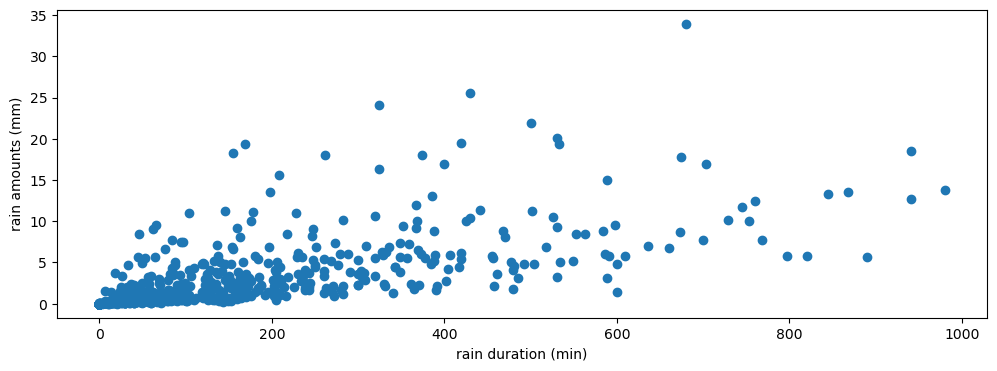

In [44]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.scatter(rain_duration, rain_amounts)
ax1.set_xlabel("rain duration (min)")
ax1.set_ylabel("rain amounts (mm)")

In [73]:
stats.pearsonr(rain_amounts, rain_duration)

PearsonRResult(statistic=0.7405203112013945, pvalue=4.7695488570520544e-191)

Text(0, 0.5, 'rain amounts (mm)')

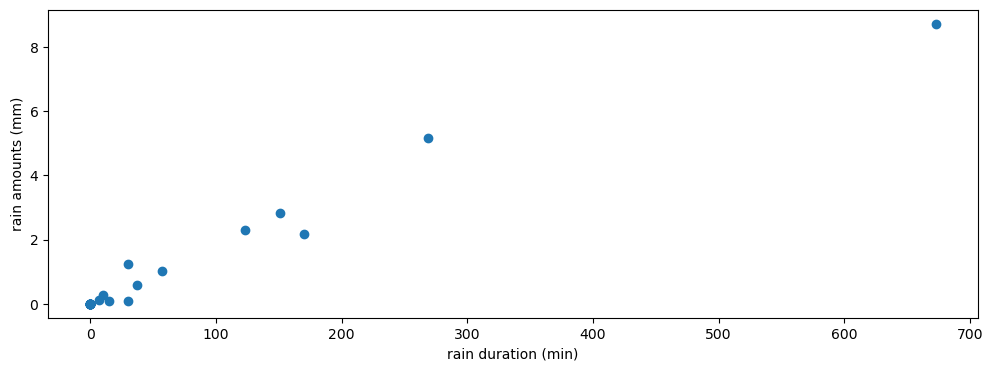

In [45]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.scatter(rain_duration.loc["2021-04"], rain_amounts.loc["2021-04"])
ax1.set_xlabel("rain duration (min)")
ax1.set_ylabel("rain amounts (mm)")

## Connecting rain and bicycles

In [46]:
actual_rain.resample("1D").sum()

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2020-01-01,254304,432,0,0.00,0
2020-01-02,249006,423,0,0.00,0
2020-01-03,215452,366,210,2.83,21
2020-01-04,208388,354,149,2.10,17
2020-01-05,249006,423,0,0.00,0
...,...,...,...,...,...
2022-12-27,254304,432,0,0.00,0
2022-12-28,199558,339,589,3.09,60
2022-12-29,226048,384,163,3.14,17


## Plotting rain and bicycles 

In [47]:
rain_duration[rain_duration==rain_duration.max()]

MESS_DATUM
2021-02-07    980
Freq: D, Name: RWS_DAU_10, dtype: int64

In [48]:
rain_duration

MESS_DATUM
2020-01-01      0
2020-01-02      0
2020-01-03    210
2020-01-04    149
2020-01-05      0
             ... 
2022-12-27      0
2022-12-28    589
2022-12-29    163
2022-12-30    125
2022-12-31    680
Freq: D, Name: RWS_DAU_10, Length: 1096, dtype: int64

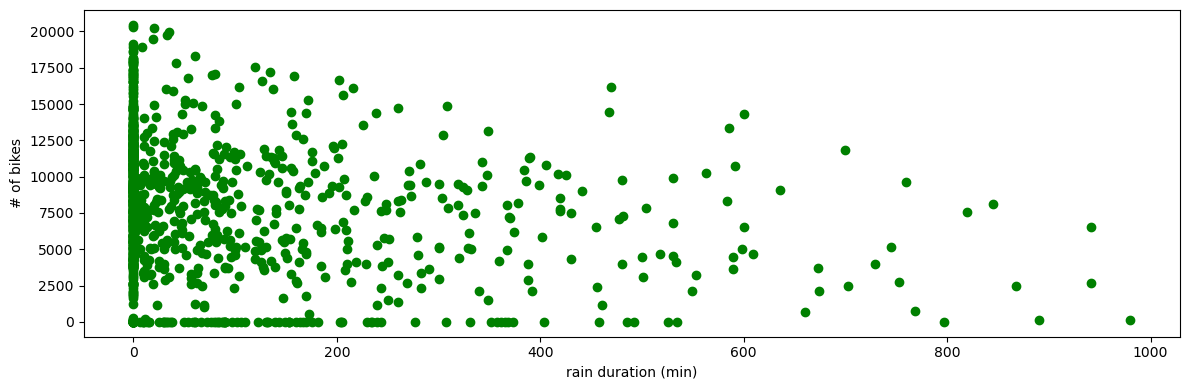

In [49]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(rain_duration[:-1], daily_bikes, color="green")
ax1.set_xlabel("rain duration (min)")
ax1.set_ylabel("# of bikes")

fig.tight_layout()

In [50]:
stats.pearsonr(rain_duration[:-1], daily_bikes)

PearsonRResult(statistic=-0.19524867401977372, pvalue=7.203087840697153e-11)

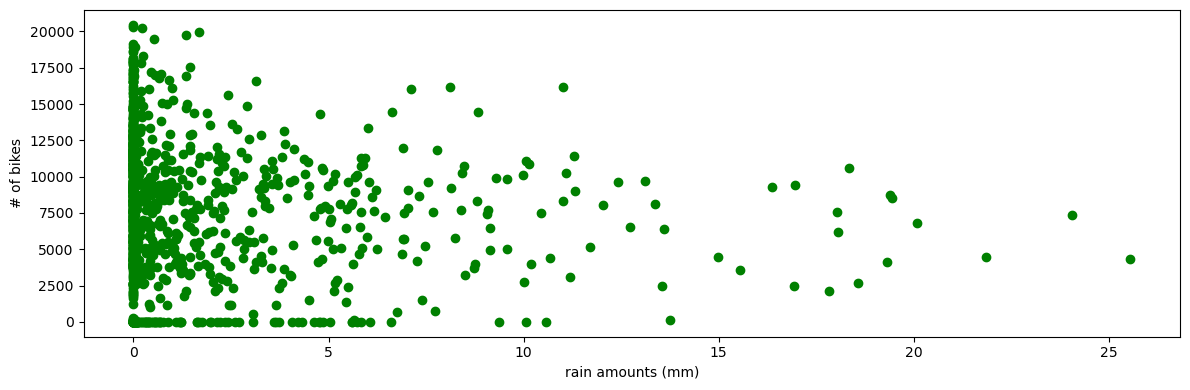

In [51]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(rain_amounts[:-1], daily_bikes, color="green")
#ax1.hlines(4304, 1, 25.55, color="red")
ax1.set_xlabel("rain amounts (mm)")
ax1.set_ylabel("# of bikes")

fig.tight_layout()

In [72]:
stats.pearsonr(rain_amounts[:-1], daily_bikes)

PearsonRResult(statistic=-0.11260618301067533, pvalue=0.00018857301730169394)

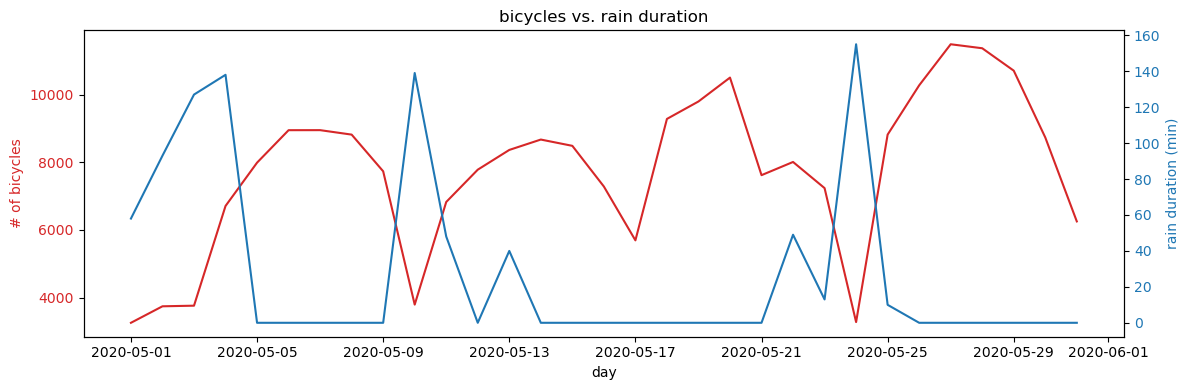

In [52]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_duration_cleaned, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [74]:
stats.pearsonr(may_bikes, may_rain_duration_cleaned)

PearsonRResult(statistic=-0.7387359659128381, pvalue=2.0822962618093546e-06)

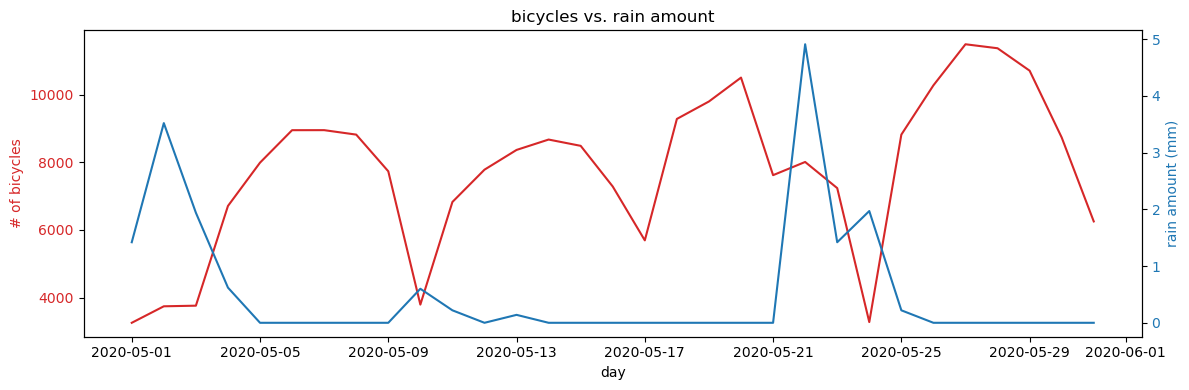

In [53]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(t, may_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain amount (mm)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, may_rain_amount_cleaned, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain amount")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [75]:
stats.pearsonr(may_bikes, may_rain_amount_cleaned)

PearsonRResult(statistic=-0.49189479889113086, pvalue=0.004944929282837113)

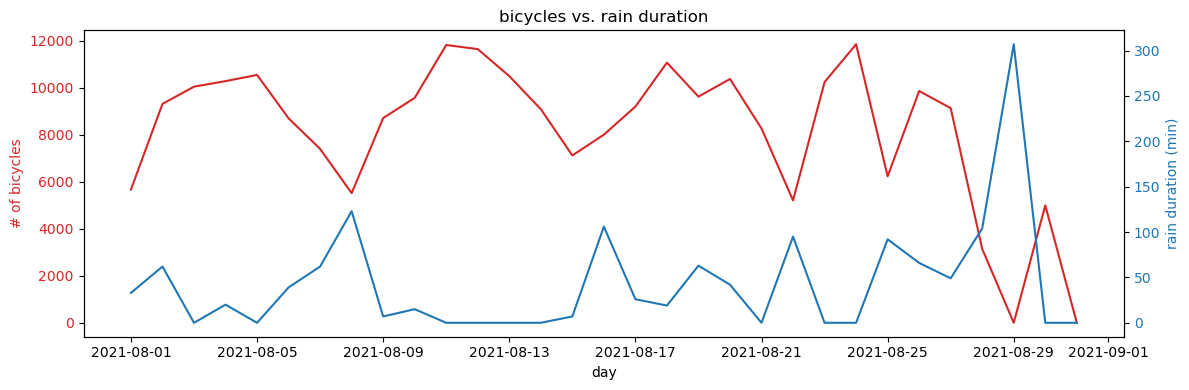

In [97]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.plot(august_bikes.index, august_bikes, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.plot(august_bikes.index, august_rain_duration, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [54]:
month_index = pd.date_range("2020-05-01", periods=31, freq="D")

In [99]:
august_index = pd.date_range("2021-08-01", periods=31, freq="D")

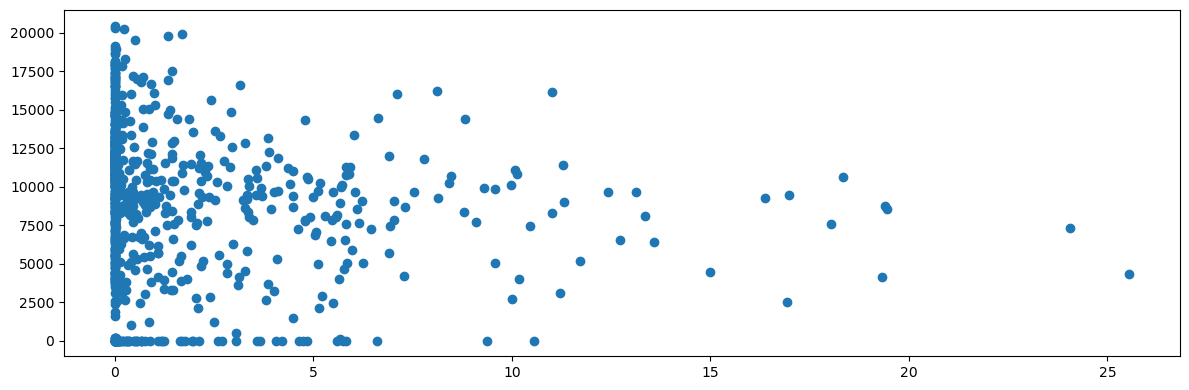

In [55]:
month_frame = pd.DataFrame(index=month_index)
month_frame["Bicycles"] = weekday_bicycles
month_frame["Rain duration"] = weekday_rain_duration
month_frame["Rain amount"] = weekday_rain_amounts
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(weekday_rain_amounts, weekday_bicycles)

fig.tight_layout()

In [56]:
month_frame_we = pd.DataFrame(index=month_index)
month_frame_we["Bicycles"] = weekend_bicycles
month_frame_we["Rain duration"] = weekend_rain_duration
month_frame_we["Rain amount"] = weekend_rain_amounts

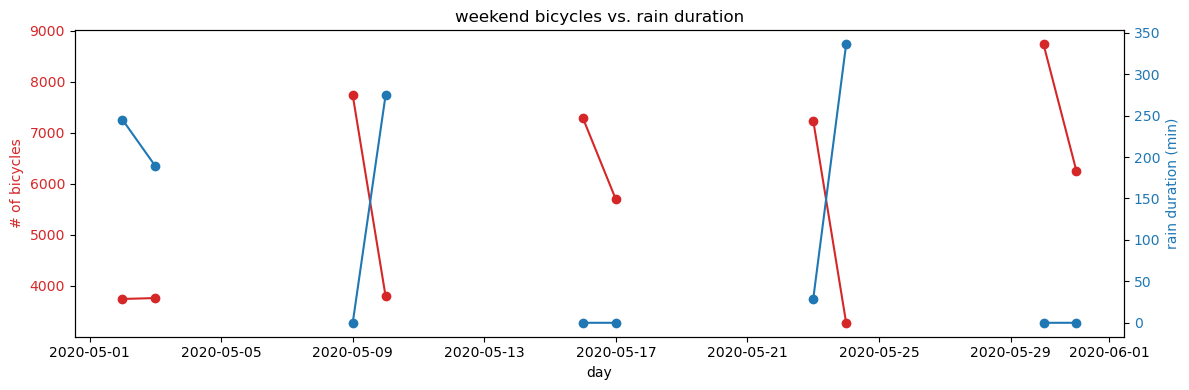

In [57]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(month_index, month_frame_we["Bicycles"], color=color)
ax1.plot(month_index, month_frame_we["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(month_index, month_frame_we["Rain duration"], color=color)
ax2.plot(month_index, month_frame_we["Rain duration"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("weekend bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [80]:
a = month_frame_we["Rain duration"].dropna()
b = month_frame_we["Bicycles"].dropna()
stats.pearsonr(a,b)

PearsonRResult(statistic=-0.8927839740280976, pvalue=0.0005070101556292943)

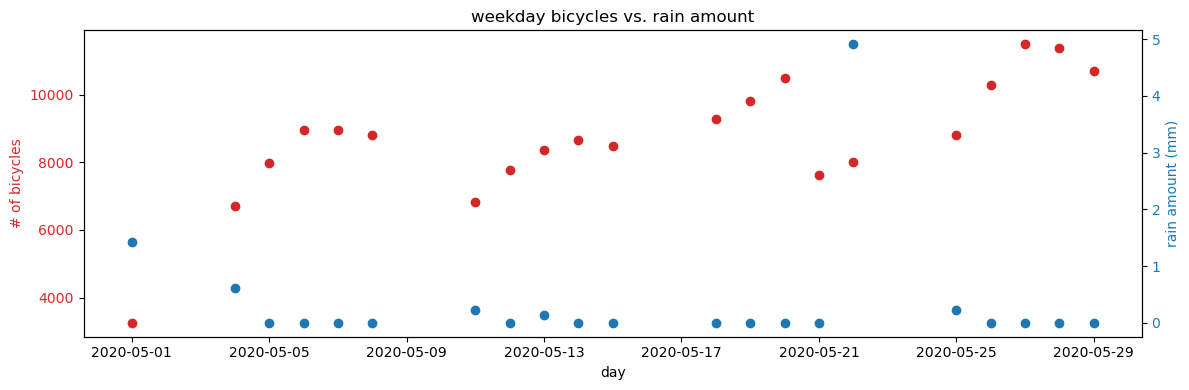

In [58]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(month_index, month_frame["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain amount (mm)', color=color)  # we already handled the x-label with ax1
ax2.scatter(month_index, month_frame["Rain amount"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("weekday bicycles vs. rain amount")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [59]:
rush_hour_bikes

Datetime
2020-01-01 16:00:00    34
2020-01-01 16:15:00    33
2020-01-01 16:30:00    42
2020-01-01 16:45:00    47
2020-01-01 17:00:00    34
                       ..
2022-12-30 17:45:00    53
2022-12-30 18:00:00    65
2022-12-30 18:15:00    67
2022-12-30 18:30:00    55
2022-12-30 18:45:00    62
Name: 100035541 (Neutor), Length: 11664, dtype: int64

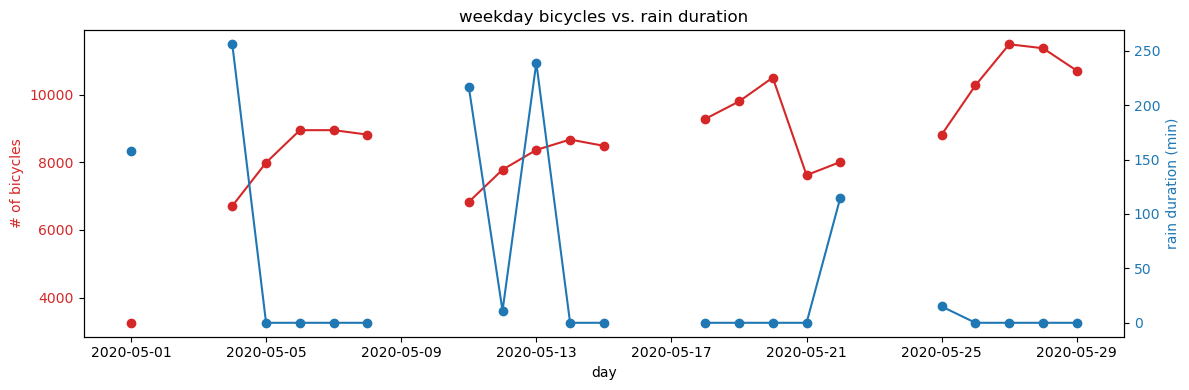

In [61]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(month_index, month_frame["Bicycles"], color=color)
ax1.plot(month_index, month_frame["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(month_index, month_frame["Rain duration"], color=color)
ax2.plot(month_index, month_frame["Rain duration"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("weekday bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [81]:
c = month_frame["Bicycles"].dropna()
d = month_frame["Rain duration"].dropna()

In [82]:
stats.pearsonr(c,d)

PearsonRResult(statistic=-0.5957640815756486, pvalue=0.004374564809691678)

In [65]:
all_bikes.loc["2020-05-01"] # LABOUR DAY

Datetime
2020-05-01 00:00:00    18
2020-05-01 00:15:00    16
2020-05-01 00:30:00    31
2020-05-01 00:45:00    21
2020-05-01 01:00:00    17
                       ..
2020-05-01 22:45:00    22
2020-05-01 23:00:00    23
2020-05-01 23:15:00    22
2020-05-01 23:30:00    19
2020-05-01 23:45:00    15
Name: 100035541 (Neutor), Length: 96, dtype: int64

In [104]:
august_rushhour_frame = pd.DataFrame(index=august_index)
august_rushhour_frame["Bicycles"] = daily_rush_hour_bikes
august_rushhour_frame["Rain duration"] = daily_rush_hour_duration
august_rushhour_frame["Rain amount"] = daily_rush_hour_amounts
august_rushhour_frame

,Bicycles,Rain duration,Rain amount
2021-08-01,NaN,NaN,NaN
2021-08-02,2606.0,0.0,0.00
2021-08-03,2719.0,0.0,0.00
2021-08-04,2625.0,20.0,0.82
2021-08-05,2687.0,0.0,0.00
2021-08-06,1969.0,13.0,0.32
2021-08-07,NaN,NaN,NaN
2021-08-08,NaN,NaN,NaN
2021-08-09,2329.0,0.0,0.00
2021-08-10,2331.0,5.0,0.07


In [60]:
rushhour_frame = pd.DataFrame(index=month_index)
rushhour_frame["Bicycles"] = daily_rush_hour_bikes
rushhour_frame["Rain duration"] = daily_rush_hour_duration
rushhour_frame["Rain amount"] = daily_rush_hour_amounts

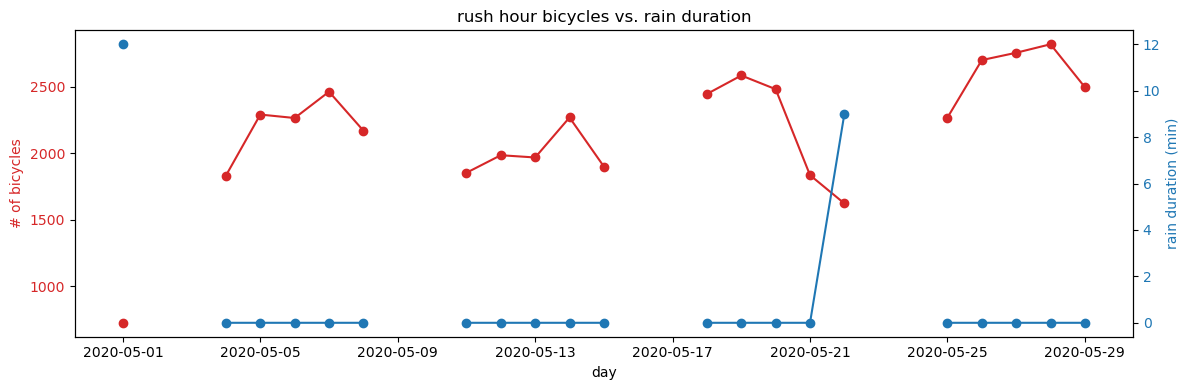

In [112]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(month_index, rushhour_frame["Bicycles"], color=color)
ax1.plot(month_index, rushhour_frame["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(month_index, rushhour_frame["Rain duration"], color=color)
ax2.plot(month_index, rushhour_frame["Rain duration"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("rush hour bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [83]:
e = rushhour_frame["Bicycles"].dropna()
f = rushhour_frame["Rain duration"].dropna()
stats.pearsonr(e,f)

PearsonRResult(statistic=-0.7412973458431691, pvalue=0.0001205296949320032)

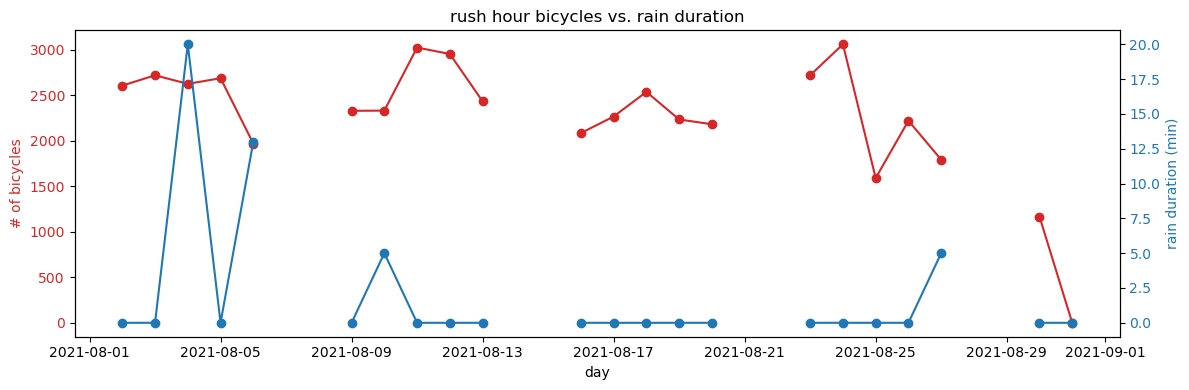

In [110]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(august_index, august_rushhour_frame["Bicycles"], color=color)
ax1.plot(august_index, august_rushhour_frame["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain duration (min)', color=color)  # we already handled the x-label with ax1
ax2.scatter(august_index, august_rushhour_frame["Rain duration"], color=color)
ax2.plot(august_index, august_rushhour_frame["Rain duration"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("rush hour bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

In [114]:
august_rushhour_frame

,Bicycles,Rain duration,Rain amount
2021-08-01,NaN,NaN,NaN
2021-08-02,2606.0,0.0,0.00
2021-08-03,2719.0,0.0,0.00
2021-08-04,2625.0,20.0,0.82
2021-08-05,2687.0,0.0,0.00
2021-08-06,1969.0,13.0,0.32
2021-08-07,NaN,NaN,NaN
2021-08-08,NaN,NaN,NaN
2021-08-09,2329.0,0.0,0.00
2021-08-10,2331.0,5.0,0.07


In [118]:
df_rain.loc["2021-08-04 16": "2021-08-04 18"]

,STATIONS_ID,QN,RWS_DAU_10,RWS_10,RWS_IND_10
MESS_DATUM,,,,,
2021-08-04 16:00:00,1766,3,0,0.00,0
2021-08-04 16:10:00,1766,3,0,0.00,0
2021-08-04 16:20:00,1766,3,7,0.00,1
2021-08-04 16:30:00,1766,3,8,0.00,1
2021-08-04 16:40:00,1766,3,10,0.78,1
2021-08-04 16:50:00,1766,3,10,0.04,1
2021-08-04 17:00:00,1766,3,6,0.00,1
2021-08-04 17:10:00,1766,3,0,0.00,0
2021-08-04 17:20:00,1766,3,0,0.00,0


<BarContainer object of 144 artists>

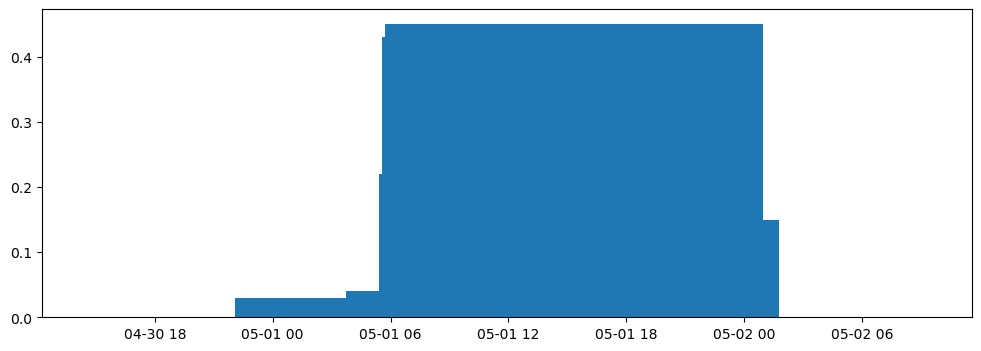

In [67]:
a = cleaned.loc["2020-05-01"]["RWS_10"]
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.bar(a.index, a)

In [68]:
a.index

DatetimeIndex(['2020-05-01 00:00:00', '2020-05-01 00:10:00',
               '2020-05-01 00:20:00', '2020-05-01 00:30:00',
               '2020-05-01 00:40:00', '2020-05-01 00:50:00',
               '2020-05-01 01:00:00', '2020-05-01 01:10:00',
               '2020-05-01 01:20:00', '2020-05-01 01:30:00',
               ...
               '2020-05-01 22:20:00', '2020-05-01 22:30:00',
               '2020-05-01 22:40:00', '2020-05-01 22:50:00',
               '2020-05-01 23:00:00', '2020-05-01 23:10:00',
               '2020-05-01 23:20:00', '2020-05-01 23:30:00',
               '2020-05-01 23:40:00', '2020-05-01 23:50:00'],
              dtype='datetime64[ns]', name='MESS_DATUM', length=144, freq=None)

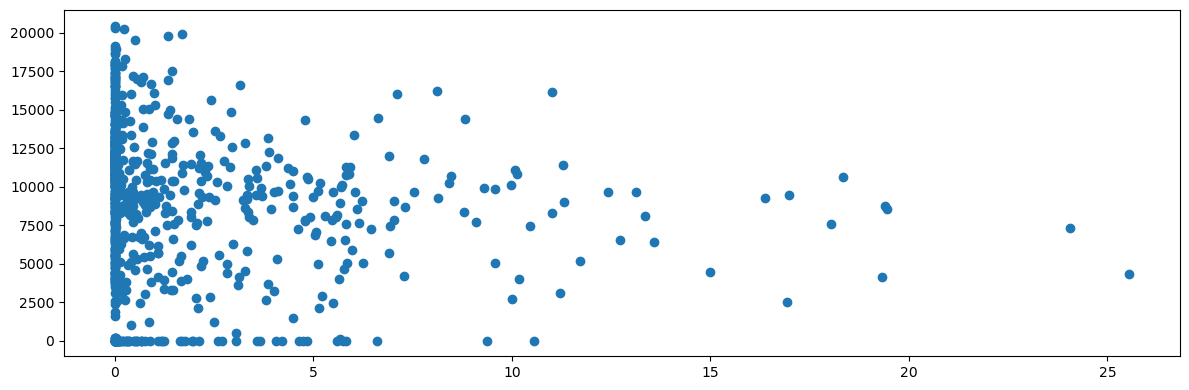

In [69]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(weekday_rain_amounts, weekday_bicycles)

fig.tight_layout()

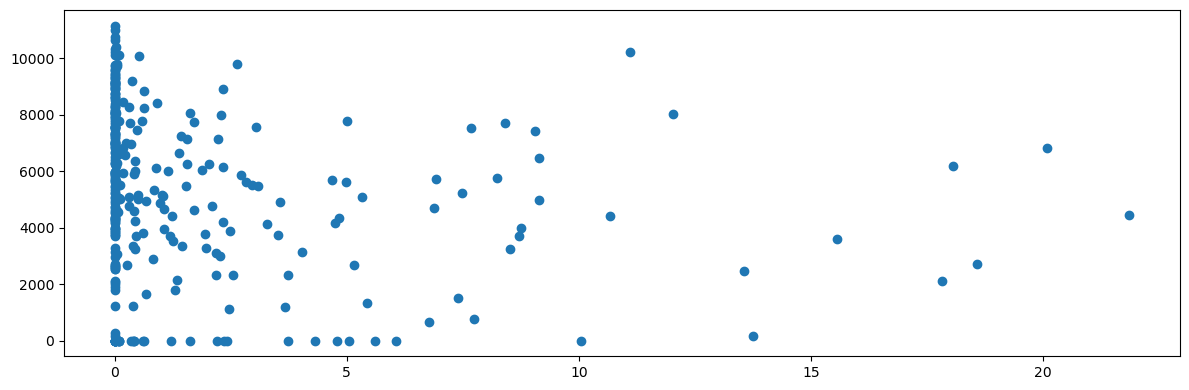

In [70]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(weekend_rain_amounts[:-1], weekend_bicycles)

fig.tight_layout()

ValueError: x and y must be the same size

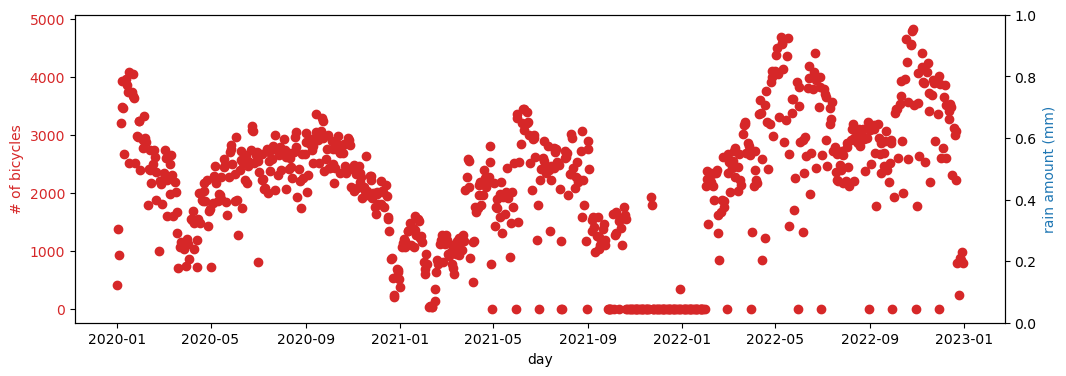

In [71]:
fig, ax1 = plt.subplots(figsize=(12, 4))

color = 'tab:red'
ax1.set_xlabel('day')
ax1.set_ylabel('# of bicycles', color=color)
ax1.scatter(daily_rush_hour_bikes.index, daily_rush_hour_bikes, color=color)
#ax1.plot(month_index, month_frame_we["Bicycles"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('rain amount (mm)', color=color)  # we already handled the x-label with ax1
ax2.scatter(daily_rush_hour_bikes.index, rain_duration[:-1], color=color)
#ax2.plot(month_index, month_frame_we["Rain duration"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_title("daily rush hour bicycles vs. rain duration")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

## Stats

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.scatter(rain_duration[:-1], daily_rush_hour_bikes)
fig.tight_layout()

In [ ]:
import statsmodels.api as sm

In [ ]:
Y = weekend_bicycles
X = weekend_rain_amounts[:-1]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

Correlation over the whole dataset

In [ ]:
stats.pearsonr(rain_duration[:-1], daily_bikes), stats.pearsonr(rain_amounts[:-1], daily_bikes)

Correlation for every month

In [84]:
months = pd.date_range("2020-01", periods=35, freq="M")
correlation_rains = []
correlation_durations = []
correlation_amounts = []
for month in months:
    index = f"{month.year}-{str(month.month).zfill(2)}"
    correlation_duration = stats.pearsonr(daily_bikes[index], rain_duration[index])[0]
    correlation_amount = stats.pearsonr(daily_bikes[index], rain_amounts[index])[0]
    correlation_rain = stats.pearsonr(rain_duration[index], rain_amounts[index])[0]
    correlation_rains.append(correlation_rain)
    correlation_amounts.append(correlation_amount)
    correlation_durations.append(correlation_duration)

In [88]:
correlations["cor(Rain duration, bikes)"].max()

0.41707694643911547

In [89]:
df_cycling.loc["2021-12"]

,100035541 (Neutor),101035541 (Neutor stadteinwärts),102035541 (Neutor stadtauswärts),100035541-status,101035541-status,102035541-status
Datetime,,,,,,
2021-12-29 03:45:00,0,0.0,NaN,0,0.0,NaN
2021-12-29 04:00:00,2,2.0,NaN,0,0.0,NaN
2021-12-29 04:15:00,1,1.0,NaN,0,0.0,NaN
2021-12-29 04:30:00,1,1.0,NaN,0,0.0,NaN
2021-12-29 04:45:00,4,4.0,NaN,0,0.0,NaN
...,...,...,...,...,...,...
2021-12-29 22:45:00,4,4.0,NaN,0,0.0,NaN
2021-12-29 23:00:00,8,8.0,NaN,0,0.0,NaN
2021-12-29 23:15:00,9,9.0,NaN,0,0.0,NaN


In [85]:
correlations = pd.DataFrame(index=months)
correlations["cor(Rain duration, rain amount)"] = correlation_rains
correlations["cor(Rain duration, bikes)"] = correlation_durations
correlations["cor(Rain amount, bikes)"] = correlation_amounts
correlations

,"cor(Rain duration, rain amount)","cor(Rain duration, bikes)","cor(Rain amount, bikes)"
2020-01-31,0.918345,0.106906,-0.041155
2020-02-29,0.807995,-0.590166,-0.582102
2020-03-31,0.874075,0.339738,0.381782
2020-04-30,0.957473,0.123073,0.157359
2020-05-31,0.547966,-0.738736,-0.491895
2020-06-30,0.758189,-0.421651,-0.377327
2020-07-31,0.964482,-0.561225,-0.572980
2020-08-31,0.724550,-0.137284,0.008025
2020-09-30,0.940920,-0.401874,-0.340444
2020-10-31,0.796345,-0.033096,0.016302


In [94]:
correlations["cor(Rain duration, bikes)"].sort_values()

2020-05-31   -0.738736
2021-08-31   -0.590258
2020-02-29   -0.590166
2022-03-31   -0.589884
2020-07-31   -0.561225
2021-06-30   -0.474710
2020-06-30   -0.421651
2020-09-30   -0.401874
2021-03-31   -0.371314
2022-02-28   -0.358661
2021-09-30   -0.315380
2022-07-31   -0.309329
2021-04-30   -0.306972
2022-06-30   -0.271008
2021-10-31   -0.261114
2022-09-30   -0.259124
2020-12-31   -0.253940
2021-02-28   -0.242921
2021-07-31   -0.178759
2020-08-31   -0.137284
2022-10-31   -0.136442
2022-08-31   -0.130483
2022-05-31   -0.078388
2020-11-30   -0.055858
2022-04-30   -0.052288
2022-11-30   -0.048852
2021-05-31   -0.045616
2020-10-31   -0.033096
2021-01-31   -0.014915
2021-11-30    0.054719
2020-01-31    0.106906
2020-04-30    0.123073
2022-01-31    0.181655
2020-03-31    0.339738
2021-12-31    0.417077
Name: cor(Rain duration, bikes), dtype: float64

In [ ]:
len(correlations.index)

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.scatter(correlations.index, correlations["cor(Rain duration, bikes)"])

fig.tight_layout()

In [ ]:
stats.pearsonr(daily_bikes["2020-05"], rain_duration["2020-05"])

In [ ]:
res_duration = stats.pearsonr(may_rain_duration, may_bikes)
res_amount = stats.pearsonr(may_rain_amount, may_bikes)

res_duration, res_amount

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 4))
ax1.hist(cleaned.resample("1D").sum()["RWS_DAU_10"])